# Reduced Spectra

<font color='gray'> Author: Pedro Mas Buitrago, Centro de Astrobiología (CAB) </font>

<font color='gray'> Last updated -- 20/september/2024 </font>

<font color='gray'> pmas@cab.inta-csic.es </font>

<font color='gray'>https://pedromasb.github.io</font>

In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy.io import fits

# NOT/ALFOSC

## Figure 1

In [3]:
target_list = ['jplus0807','jplus0903','jplus0744','jplus0914','jplus0114','jplus0708','jplus0226']
spt = ['dM8.5','dM5','dM5','dM5','dM4','dM4','dM4']

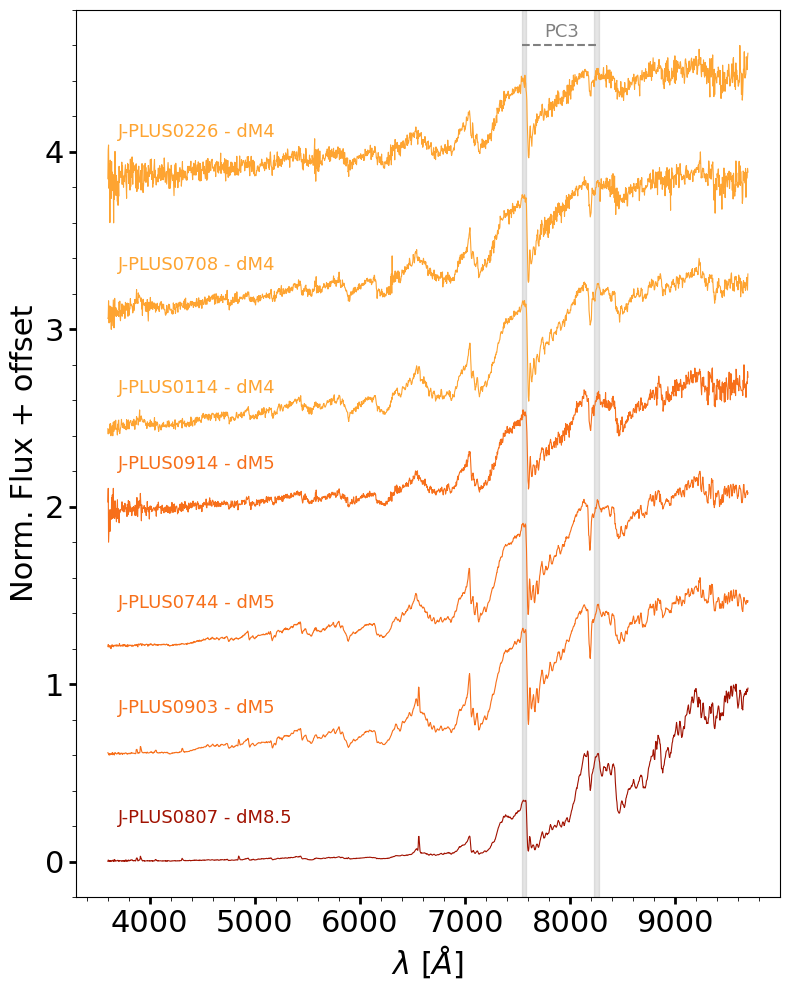

In [4]:
cmap = matplotlib.colormaps.get_cmap('turbo_r')
col1 = cmap(0.05)
col2 = cmap(0.23)
col3 = cmap(0.3)

colours_list = [col1,col2,col2,col2,col3,col3,col3]

fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlabel('$\lambda$ $[\AA]$',fontsize=22)
ax.set_ylabel('Norm. Flux + offset',fontsize=22)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', labelsize=22,width=2,length=5)
ax.tick_params(axis='both', which='minor', labelsize=22,length=3)

for (i, obj) in enumerate(target_list):
    
    objred = obj.replace('lus','')
    objlabel = obj.replace('jp','j-p')
    
    path = f'data/NOT_ALFOSC'
    
    file_ = fits.open(f'{path}/{objred}_fluxcal.fits')
    cond = (file_[1].data['wave'] > 3600) & (file_[1].data['wave'] < 11000)
    flux = file_[1].data[cond]['flux']
    wave = file_[1].data[cond]['wave']
        
    flux = (flux - flux.min()) / (flux.max() - flux.min())
    
    sp = pd.DataFrame(np.stack([wave,flux],axis=1),columns=['wave','flux'])
    
    ax.plot(sp['wave'].values,sp['flux'].values+(i*0.6),color=colours_list[i],lw=0.8)
    ax.annotate(f'{objlabel.upper()} - {spt[i]}',xy=(3700,sp['flux'].values[200]+(i*0.6)+0.2),color=colours_list[i],fontsize=13)

ax.hlines(y=4.6,xmin=7540,xmax=8270,ls='--',color='grey',zorder=0,lw=1.5)
ax.annotate('PC3',xy=(7755,4.65),color='grey',fontsize=13)
ax.fill_between(np.linspace(8230,8270),y1=-0.2,y2=4.8,color='grey', alpha=0.2)
ax.fill_between(np.linspace(7540,7580),y1=-0.2,y2=4.8,color='grey', alpha=0.2)

ax.set_ylim(-0.2,4.8)
plt.tight_layout()
plt.show()

## Figure 2

In [5]:
target_list = ['jplus0807','jplus0903']
spt = ['dM8.5','dM5']

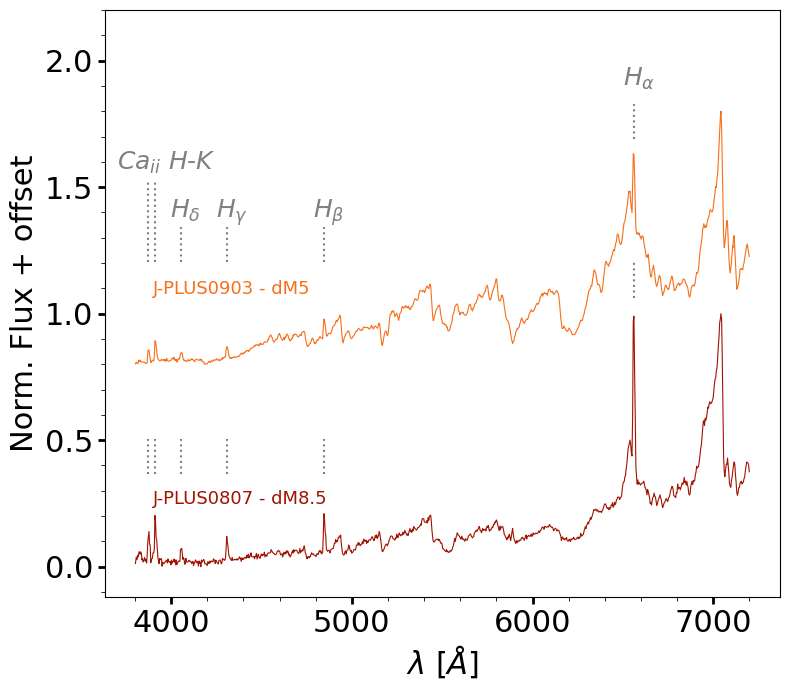

In [31]:
cmap = matplotlib.colormaps.get_cmap('turbo_r')

col1 = cmap(0.05)
col2 = cmap(0.23)

colours_list = [col1,col2]

fig, ax = plt.subplots(figsize=(8,7))

ax.set_xlabel('$\lambda$ $[\AA]$',fontsize=22)
ax.set_ylabel('Norm. Flux + offset',fontsize=22)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', labelsize=22,width=2,length=5)
ax.tick_params(axis='both', which='minor', labelsize=22,length=3)

for (i, obj) in enumerate(target_list):
    
    objred = obj.replace('lus','')
    objlabel = obj.replace('jp','j-p')
    
    path = f'data/NOT_ALFOSC'
    
    file_ = fits.open(f'{path}/{objred}_fluxcal.fits')
    cond = (file_[1].data['wave'] > 3800) & (file_[1].data['wave'] <= 7200)
    flux = file_[1].data[cond]['flux']
    wave = file_[1].data[cond]['wave']
        
    flux = (flux - flux.min()) / (flux.max() - flux.min())
    
    sp = pd.DataFrame(np.stack([wave,flux],axis=1),columns=['wave','flux'])
    
    ax.plot(sp['wave'].values,sp['flux'].values+(i*0.8),color=colours_list[i],lw=0.8)
    ax.annotate(f'{objlabel.upper()} - {spt[i]}',xy=(3900,sp['flux'].values[200]+(i*0.8)+0.2),color=colours_list[i],fontsize=13)

    
ax.set_ylim(-0.12,2.2)

ax.axvline(x=6558.5,ymin=0.78,ymax=0.84,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4844,ymin=0.57,ymax=0.63,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4308,ymin=0.57,ymax=0.63,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4056,ymin=0.57,ymax=0.63,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3910,ymin=0.57,ymax=0.71,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3874,ymin=0.57,ymax=0.71,ls=':',color='grey',zorder=10,lw=1.5)

ax.axvline(x=6558.5,ymin=0.51,ymax=0.57,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4844,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4308,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4056,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3910,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3874,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)

ax.annotate(r'$H_{\alpha}$',xy=(6500,1.9),color='grey',fontsize=18)
ax.annotate(r'$H_{\beta}$',xy=(4784,1.38),color='grey',fontsize=18)
ax.annotate(r'$H_{\gamma}$',xy=(4248,1.38),color='grey',fontsize=18)
ax.annotate(r'$H_{\delta}$',xy=(3996,1.38),color='grey',fontsize=18)
ax.annotate(r"$Ca_{ii}$ $H$-$K$",xy=(3700,1.57),color='grey',fontsize=18)

plt.tight_layout()
plt.show()

# GTC/OSIRIS

In [32]:
target_list = ['jplus0807','jplus0903']
target_osiris= ['jp0807','jp0903']
spt = ['dM8.5','dM5']

## Figure 1

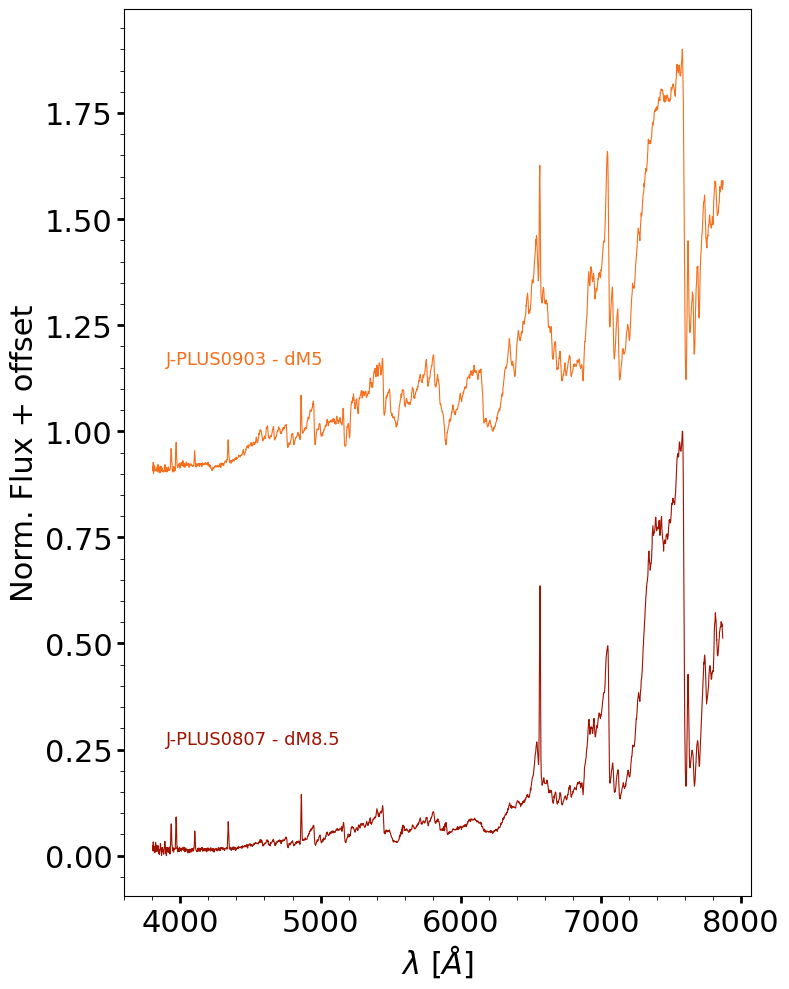

In [35]:
cmap = matplotlib.colormaps.get_cmap('turbo_r')
col1 = cmap(0.05)
col2 = cmap(0.23)

colours_list = [col1,col2]

fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlabel('$\lambda$ $[\AA]$',fontsize=22)
ax.set_ylabel('Norm. Flux + offset',fontsize=22)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', labelsize=22,width=2,length=5)
ax.tick_params(axis='both', which='minor', labelsize=22,length=3)

for (i, obj) in enumerate(target_list):
    
    objred = obj.replace('lus','')
    objlabel = obj.replace('jp','j-p')
    
    path = f'data/GTC_OSIRIS'
    
    file_ = fits.open(f'{path}/{target_osiris[i]}_fluxcal_osiris.fits')
    cond = (file_[1].data['wave'] > 3800) & (file_[1].data['wave'] < 8000)
    flux = file_[1].data[cond]['flux']
    wave = file_[1].data[cond]['wave']
        
    flux = (flux - flux.min()) / (flux.max() - flux.min())
    
    sp = pd.DataFrame(np.stack([wave,flux],axis=1),columns=['wave','flux'])
    
    ax.plot(sp['wave'].values,sp['flux'].values+(i*0.9),color=colours_list[i],lw=0.8)
    ax.annotate(f'{objlabel.upper()} - {spt[i]}',xy=(3900,sp['flux'].values[200]+(i*0.9)+0.25),color=colours_list[i],fontsize=13)

plt.tight_layout()
plt.show()

## Figure 2

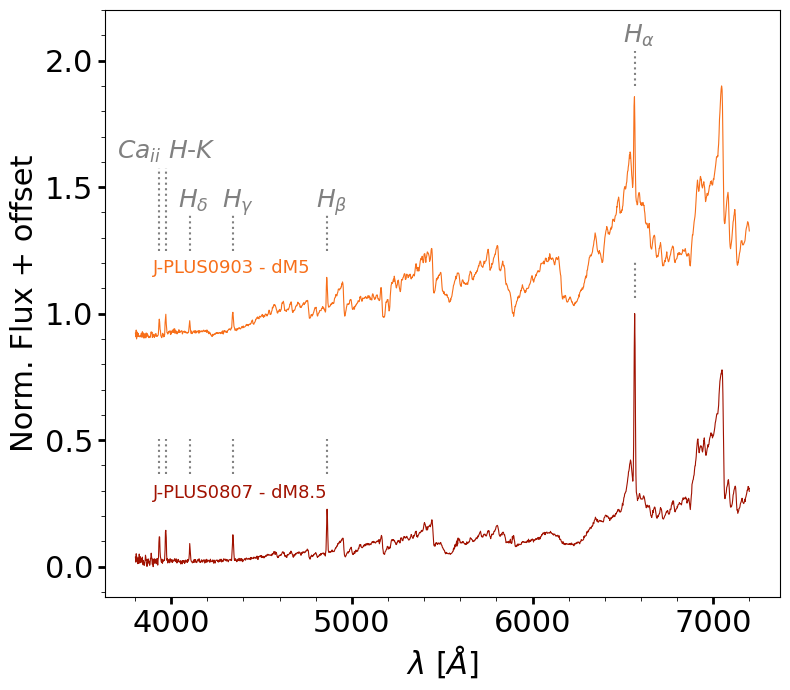

In [36]:
cmap = matplotlib.colormaps.get_cmap('turbo_r')
col1 = cmap(0.05)
col2 = cmap(0.23)

colours_list = [col1,col2]

fig, ax = plt.subplots(figsize=(8,7))

ax.set_xlabel('$\lambda$ $[\AA]$',fontsize=22)
ax.set_ylabel('Norm. Flux + offset',fontsize=22)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='both', which='major', labelsize=22,width=2,length=5)
ax.tick_params(axis='both', which='minor', labelsize=22,length=3)

for (i, obj) in enumerate(target_list):
    
    objred = obj.replace('lus','')
    objlabel = obj.replace('jp','j-p')
    
    path = f'data/GTC_OSIRIS'
    
    file_ = fits.open(f'{path}/{target_osiris[i]}_fluxcal_osiris.fits')
    cond = (file_[1].data['wave'] > 3800) & (file_[1].data['wave'] < 7200)
    flux = file_[1].data[cond]['flux']
    wave = file_[1].data[cond]['wave']
        
    flux = (flux - flux.min()) / (flux.max() - flux.min())
    
    sp = pd.DataFrame(np.stack([wave,flux],axis=1),columns=['wave','flux'])
    
    ax.plot(sp['wave'].values,sp['flux'].values+(i*0.9),color=colours_list[i],lw=0.8)
    ax.annotate(f'{objlabel.upper()} - {spt[i]}',xy=(3900,sp['flux'].values[200]+(i*0.9)+0.25),color=colours_list[i],fontsize=13)

ax.set_ylim(-0.12,2.2)

ax.axvline(x=6565,ymin=0.87,ymax=0.93,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4862,ymin=0.59,ymax=0.65,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4341.1,ymin=0.59,ymax=0.65,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4102.3,ymin=0.59,ymax=0.65,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3969,ymin=0.59,ymax=0.73,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3934.5,ymin=0.59,ymax=0.73,ls=':',color='grey',zorder=10,lw=1.5)

ax.axvline(x=6565,ymin=0.51,ymax=0.57,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4862,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4341.1,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=4102.3,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3969,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)
ax.axvline(x=3934.5,ymin=0.21,ymax=0.27,ls=':',color='grey',zorder=10,lw=1.5)

ax.annotate(r'$H_{\alpha}$',xy=(6500,2.07),color='grey',fontsize=18)
ax.annotate(r'$H_{\beta}$',xy=(4800,1.42),color='grey',fontsize=18)
ax.annotate(r'$H_{\gamma}$',xy=(4280,1.42),color='grey',fontsize=18)
ax.annotate(r'$H_{\delta}$',xy=(4040,1.42),color='grey',fontsize=18)
ax.annotate(r"$Ca_{ii}$ $H$-$K$",xy=(3700,1.61),color='grey',fontsize=18)

plt.tight_layout()
plt.show()